# Box Office Grosses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
movies = pd.read_csv("./data/movies.txt", delimiter="\t")
release = pd.read_csv("./data/releaseDates.txt", delimiter="\t", parse_dates=["ReleaseDate"])

movies = movies.join(release.set_index("Title"), on="Title")
movies

,Title,Studio,AdjustedGross,ReleaseDate
0,101 Dalmatians,Dis.,8.572900e+08,1961-01-25
1,Avatar,Fox,8.344502e+08,2009-12-18
2,Ben-Hur,MGM,8.408400e+08,1959-11-18
3,Doctor Zhivago,MGM,1.070000e+09,1965-12-22
4,E.T.: The Extra-Terrestrial,Uni.,1.220000e+09,1982-06-11
5,Gone with the Wind,MGM,1.730000e+09,1939-12-15
6,Jaws,Uni.,1.100000e+09,1975-06-20
7,Snow White and the Seven Dwarfs,Dis.,9.352200e+08,1937-12-21
8,Star Wars,Fox,1.530000e+09,1977-05-25
9,Star Wars: The Force Awakens,BV,9.276696e+08,2015-12-18


In [3]:
movies.sort_values(by="ReleaseDate", inplace=True, ignore_index=True)
movies

,Title,Studio,AdjustedGross,ReleaseDate
0,Snow White and the Seven Dwarfs,Dis.,9.352200e+08,1937-12-21
1,Gone with the Wind,MGM,1.730000e+09,1939-12-15
2,The Ten Commandments,Par.,1.120000e+09,1956-10-05
3,Ben-Hur,MGM,8.408400e+08,1959-11-18
4,101 Dalmatians,Dis.,8.572900e+08,1961-01-25
5,The Sound of Music,Fox,1.220000e+09,1965-03-02
6,Doctor Zhivago,MGM,1.070000e+09,1965-12-22
7,The Exorcist,WB,9.489409e+08,1973-12-26
8,Jaws,Uni.,1.100000e+09,1975-06-20
9,Star Wars,Fox,1.530000e+09,1977-05-25


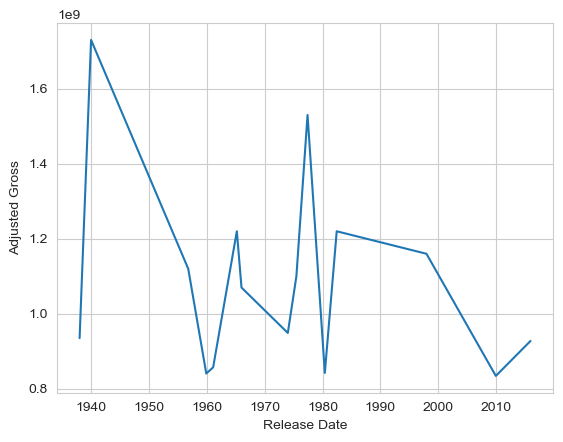

In [4]:
plt.figure()
plt.plot(movies.ReleaseDate, movies.AdjustedGross)
plt.xlabel("Release Date")
plt.ylabel("Adjusted Gross")
plt.show()

In [5]:
movies.Studio = pd.Categorical(movies.Studio)
movies.Studio

0     Dis.
1      MGM
2     Par.
3      MGM
4     Dis.
5      Fox
6      MGM
7       WB
8     Uni.
9      Fox
10     Fox
11    Uni.
12    Par.
13     Fox
14      BV
Name: Studio, dtype: category
Categories (7, object): ['BV', 'Dis.', 'Fox', 'MGM', 'Par.', 'Uni.', 'WB']

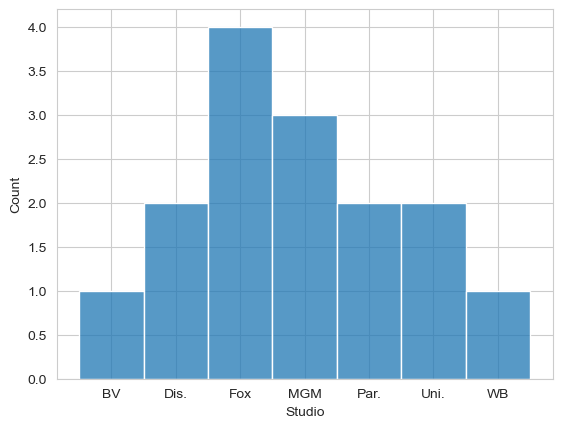

In [6]:
plt.figure()
sns.histplot(movies.Studio.sort_values())
plt.show()

In [7]:
mgm_index = movies.Studio == "MGM"
mgm_movies = movies.Title[mgm_index]
mgm_movies

1    Gone with the Wind
3               Ben-Hur
6        Doctor Zhivago
Name: Title, dtype: object

In [8]:
mgm_ARD = movies.ReleaseDate[mgm_index].mean()
mgm_ARD

Timestamp('1955-04-09 00:00:00')